## Задача 1.
$$
c^T x \rightarrow \min\quad \text{s.t.} \quad Ax=b,\;-x\leq0
$$
a)
Функция Лагранжа для этой задачи: 
$$
L(x, \lambda, \mu) = c^T x - \lambda^T x + \mu^T (Ax - b)
$$
Двойственная функция:
$$
q(\lambda, \mu) = \inf_x L(x, \lambda, \mu) = \inf_x\ (c^T - \lambda^T + \mu^T A) x - \mu^T b
$$
Поскольку $x \in \mathbb{R}^n$, то 
$$
q(\lambda, \mu) = \begin{cases}-\infty, & c^T - \lambda^T + \mu^T A \neq 0 \\ -\mu^T b, & \text{otherwise}\end{cases}
$$

Двойственная задача:
$$
q(\lambda, \mu) \rightarrow \max\quad \text{s.t.} \quad \lambda \geq 0
$$
Что равносильно
$$
\mu^T b \rightarrow \min\quad \text{s.t.} \quad c^T - \lambda^T + \mu^T A = 0,\; -\lambda \leq 0
$$

In [2]:
import numpy as np
import cvxpy as cp

def get_dual_solution(c, A, b):
    lam = cp.Variable(c.size)
    mu = cp.Variable(b.size)
    prob = cp.Problem(
        cp.Minimize(mu.T @ b),
        [c.T - lam.T + mu.T @ A == 0, -lam <= 0]
    )
    prob.solve()
    return lam.value, mu.value

In [3]:
# параметры взял отсюда: https://www.matburo.ru/Examples/Files/LP_Graph3.pdf
A = np.array([
    [5, -6, 1, -2],
    [11, -14, 2, -5]
])
b = np.array([2, 2])
c = np.array([1, 1, 3, 4])

lam, mu = get_dual_solution(c, A, b)
lam, mu

(array([-3.86076410e-09, -1.66622965e-11,  2.25000000e+00,  2.75000000e+00]),
 array([-6.25000001,  2.75000001]))

б) из того, что $\lambda_i$ отличны от нуля, можно заключить, что $x^\star_i = 0$ (неравенство является для них равенством). Оставшиеся координаты должны найтись из $Ax^\star = b$.

In [4]:
def get_primal_solution(c, A, b, lam, mu):
    active = np.isclose(lam, 0)
    A_active = A[:, active]
    x_active = np.linalg.inv(A_active) @ b
    x = np.zeros_like(c)
    x[active] = x_active
    return x
# видно, что на самом деле нужны только A, b, lam

In [5]:
get_primal_solution(c, A, b, lam, mu)

array([4, 3, 0, 0])

## Задача 2.

In [6]:
import cvxpy as cp

def opt_ball(xs):
    center = cp.Variable((1, xs.shape[1]))
    prob = cp.Problem(
        cp.Minimize(
            cp.max(cp.sum((xs - center)**2, axis=1))
        )
    )
    prob.solve()
    return center.value, np.sqrt(prob.value)

In [7]:
opt_ball(np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]))

(array([[0.5, 0.5]]), 0.7071067811440934)

## Задача 3.

In [79]:
import cvxpy as cp

def svm(xs, ys):
    a = cp.Variable((1, xs.shape[1]))
    x1 = xs[ys == 1]
    x0 = xs[ys == 0]
    mxbound = cp.Variable(1)
    mnbound = cp.Variable(1)
    constraints = []
    constraints += [ mxbound <= x @ a.T for x in x1 ]
    constraints += [ mnbound >= x @ a.T for x in x0 ]
    constraints += [ cp.sum_squares(a) <= 1 ] 
    prob = cp.Problem(
        cp.Maximize(
            mxbound - mnbound
        ),
        constraints
    )
    prob.solve()
    return a.value, prob.value

In [92]:
from matplotlib import pyplot as plt

xs = np.random.randn(100, 2)
def f(x):
    return 3 * x.flatten()[0] - 2 * x.flatten()[1]
xs = np.array([x - [np.random.uniform(0, 0.3), -np.random.uniform(0, 0.3)] if f(x) <= 0 else x + [np.random.uniform(0, 0.3), -np.random.uniform(0, 0.3)] for x in xs])
ys = np.array([f(x) <= 0 for x in xs], dtype=np.int)

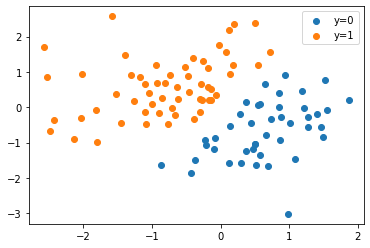

In [93]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], label='y=0')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], label='y=1')
plt.legend()

In [94]:
a, v = svm(xs, ys)
print(a, v)

[[-0.83499464  0.55025808]] 0.3132042144776096


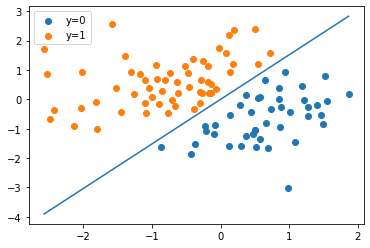

In [95]:
plt.scatter(xs[ys == 0, 0], xs[ys == 0, 1], label='y=0')
plt.scatter(xs[ys == 1, 0], xs[ys == 1, 1], label='y=1')

# a -- вектор нормали к поверхности
a = np.array([-a[0, 1], a[0, 0]])
t = np.linspace(np.min(xs[:, 0]), np.max(xs[:, 0]), 1000)
if a[0] != 0.0:
    t /= a[0]
plt.plot(t * a[0], t * a[1])
plt.legend()